### task is to  predict the humidity will be high or not at 3 pm  based on the other input feature

In [9]:
### import libraries

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"C:\Users\abhis\Downloads\daily_weather.csv")

In [12]:
df.head()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,1
1,917.347688,71.403843,101.935179,2.443009,140.471549,3.533324,0.0,0.0,24.328697,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1092 non-null   float64
 1   air_temp_9am            1090 non-null   float64
 2   avg_wind_direction_9am  1091 non-null   float64
 3   avg_wind_speed_9am      1092 non-null   float64
 4   max_wind_direction_9am  1092 non-null   float64
 5   max_wind_speed_9am      1091 non-null   float64
 6   rain_accumulation_9am   1089 non-null   float64
 7   rain_duration_9am       1092 non-null   float64
 8   relative_humidity_9am   1095 non-null   float64
 9   high_humidity_3pm       1095 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 85.7 KB


In [14]:
df.isnull().sum()

air_pressure_9am          3
air_temp_9am              5
avg_wind_direction_9am    4
avg_wind_speed_9am        3
max_wind_direction_9am    3
max_wind_speed_9am        4
rain_accumulation_9am     6
rain_duration_9am         3
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [15]:
#### remove the null value

In [16]:
df.dropna(inplace = True)

In [17]:
df.isnull().sum()

air_pressure_9am          0
air_temp_9am              0
avg_wind_direction_9am    0
avg_wind_speed_9am        0
max_wind_direction_9am    0
max_wind_speed_9am        0
rain_accumulation_9am     0
rain_duration_9am         0
relative_humidity_9am     0
high_humidity_3pm         0
dtype: int64

In [18]:
df.describe()

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,high_humidity_3pm
count,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000,1064.000000
mean,918.903180,65.022609,142.306756,5.485793,148.480424,6.999714,0.182023,266.393697,34.077440,0.497180
std,3.179040,11.168033,69.149472,4.534427,67.154911,5.590790,1.534493,1503.092216,25.356668,0.500227
min,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,0.000000
25%,916.595376,57.398000,65.979244,2.245529,76.335351,3.064608,0.000000,0.000000,15.093365,0.000000
50%,918.942281,65.778479,165.937461,3.869906,176.350000,4.943637,0.000000,0.000000,23.135000,0.000000
75%,921.169054,73.530872,191.100000,7.264463,201.125000,8.747888,0.000000,0.000000,44.660000,1.000000
max,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,1.000000


In [19]:
df.high_humidity_3pm.value_counts()

0    535
1    529
Name: high_humidity_3pm, dtype: int64

- 0 represent humidity will not be high at 3 pm
- 1 represent humidity will be high at 3 pm

### saperate the data into dependent and independent features

In [20]:
x= df.iloc[:,:9]

In [21]:
y=df.iloc[:,-1]

In [22]:
### create instance of the decision tree classifier

In [23]:
classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [24]:
### split the dataset into the train and test data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
print(x_train.shape,x_test.shape)

(798, 9) (266, 9)


In [27]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [28]:
y_pred = classifier.predict(x_test)

In [29]:
y_pred[:10]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [30]:
y_test[:10]

178     1
1013    1
704     1
533     1
882     0
712     1
254     1
1036    0
642     1
207     1
Name: high_humidity_3pm, dtype: int64

In [31]:
accuracy = accuracy_score(y_test,y_pred)*100

In [32]:
print('the accuracy of the decision tree classifier is :',accuracy,'%')

the accuracy of the decision tree classifier is : 90.22556390977444 %


#### visualizing the decision tree using sklearn 

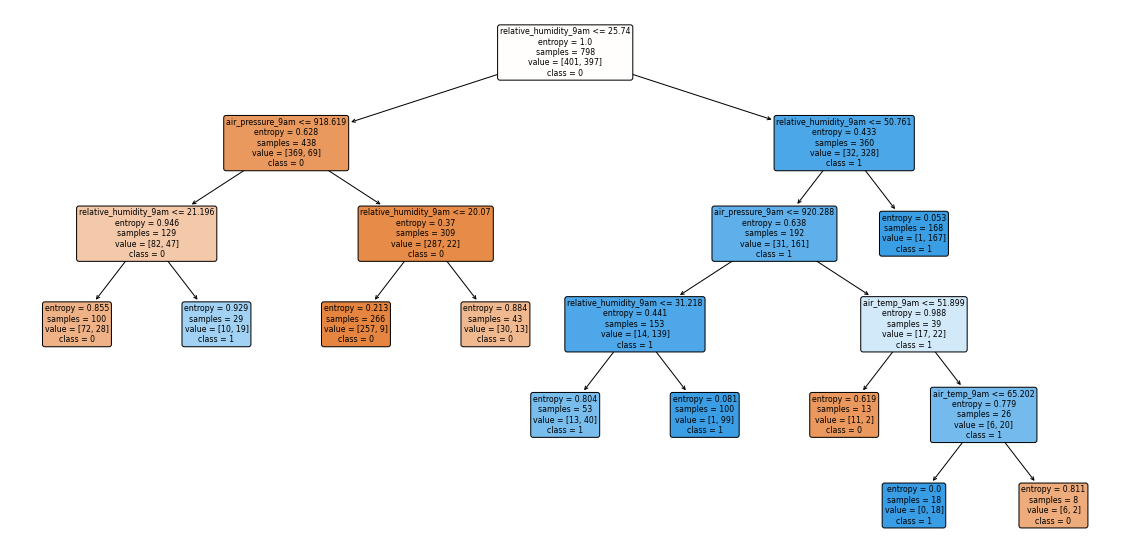

In [37]:
plt.figure(figsize=(20, 10))
tree.plot_tree(classifier,
               feature_names=x_train.columns,
               class_names=['0','1'],
               filled=True,
               rounded=True)

plt.show()

In [41]:
### tree.export_text function give the information of the tree split  in the text format

In [39]:
print(tree.export_text(classifier))

|--- feature_8 <= 25.74
|   |--- feature_0 <= 918.62
|   |   |--- feature_8 <= 21.20
|   |   |   |--- class: 0
|   |   |--- feature_8 >  21.20
|   |   |   |--- class: 1
|   |--- feature_0 >  918.62
|   |   |--- feature_8 <= 20.07
|   |   |   |--- class: 0
|   |   |--- feature_8 >  20.07
|   |   |   |--- class: 0
|--- feature_8 >  25.74
|   |--- feature_8 <= 50.76
|   |   |--- feature_0 <= 920.29
|   |   |   |--- feature_8 <= 31.22
|   |   |   |   |--- class: 1
|   |   |   |--- feature_8 >  31.22
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  920.29
|   |   |   |--- feature_1 <= 51.90
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  51.90
|   |   |   |   |--- feature_1 <= 65.20
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  65.20
|   |   |   |   |   |--- class: 0
|   |--- feature_8 >  50.76
|   |   |--- class: 1

